In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False)
data = mnist["data"]
labels = mnist["target"]

In [2]:
import numpy.random
idx = numpy.random.RandomState(0).choice(70000, 11000)
train = data[idx[:10000], :].astype(int)
train_labels = labels[idx[:10000]]
test = data[idx[10000:], :].astype(int)
test_labels = labels[idx[10000:]]


In [3]:
def euclidean_distance(vec1, vec2):
    return numpy.sqrt(numpy.sum((vec1 - vec2) ** 2))

In [4]:
from collections import Counter
def KNN(train_images, train_labels, query_image, k):
  #calculate the distances
  distances = []
  for train_image in train_images:
      distance = euclidean_distance(query_image, train_image)
      distances.append(distance)
  distances = numpy.array(distances)
  #find the indices and labels of knn
  sorted_indices = numpy.argsort(distances)
  knn_indices = sorted_indices[:k]
  knn_labels = train_labels[knn_indices]
  #find the most common value by
  counter = Counter(knn_labels)
  knn_clasify = counter.most_common(1)[0][0]
  return knn_clasify

In [5]:
def KNN_accuracy(train_images_quantity, k):
  counter=0
  for i in range(1000):
    if KNN(train[:train_images_quantity],train_labels[:train_images_quantity],test[i],k) == test_labels[i]:
      counter +=1
  return(counter/1000)

In [6]:
print("The accuracy of k=10 and train above all the train images is: " + str(KNN_accuracy(1000,10)))

The accuracy of k=10 and train above all the train images is: 0.858


b) Random clasiffier should be correct aproximatly 10% of the time because there are 10 posible digits.

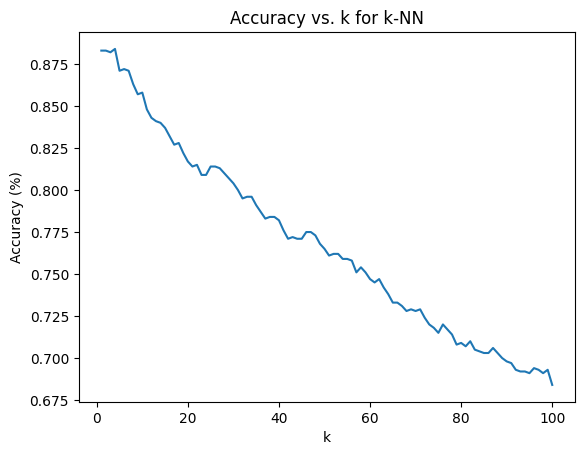

In [7]:
import matplotlib.pyplot as plt
accuracies = []
for k in range(1,101):
   accuracies.append(KNN_accuracy(1000,k))
plt.plot(range(1,101), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. k for k-NN')
plt.show()

In [8]:
max_accuracy = max(accuracies)
max_accuracy_index = accuracies.index(max_accuracy)
print("The best k is:" +str(max_accuracy_index +1))

The best k is:4


k = 4 gave me the best performence so i assume that the data has distinct clusters and not a lot of noise.

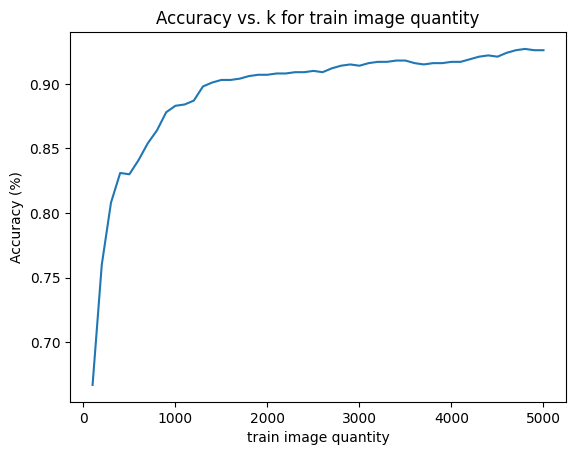

In [9]:
accuracies = []
for n in range(100, 5001, 100):
  accuracies.append(KNN_accuracy(n,1))
plt.plot(range(100, 5001, 100), accuracies)
plt.xlabel('train image quantity')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. k for train image quantity')
plt.show()

Increasing the amount of training data achieves better accuracy, with more training data it is more likly to find close neihbor what increase the accuracy.